In [1]:
# scientific computing library
import numpy as np

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# show plots without need of calling `.show()`
%matplotlib inline

# prettify plots
plt.rcParams['figure.figsize'] = [20.0, 5.0]
sns.set_palette(sns.color_palette("muted"))
sns.set_style("ticks")

# supress warnings
import warnings
warnings.filterwarnings('ignore')

Find **global minimizer** of function $f$:
$$f(x) = x^{2} - 2x + 5sin(x)$$

In [11]:
# function definition
def f(x):
    return x**2 - 2*x + 5*np.sin(x)

Minimizer: [-0.77901491]
Message: Optimization terminated successfully.
Success: True


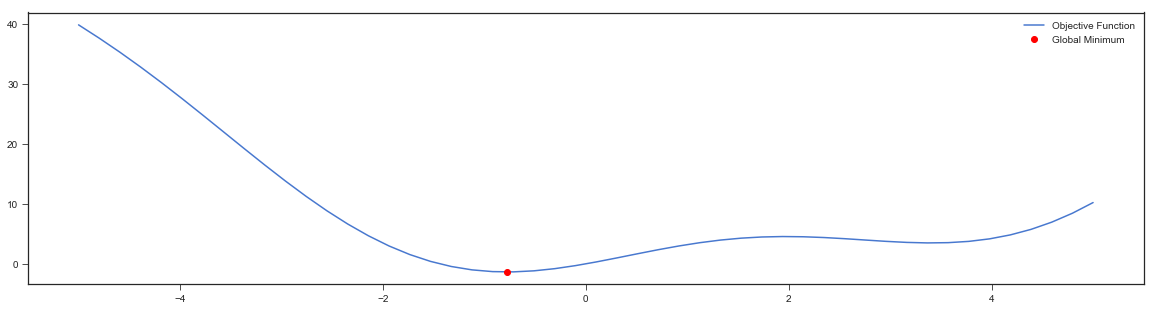

In [15]:
# optimization package
from scipy.optimize import minimize
"""
`minimize(fun, x0, method, tol)`:
    
    Parameters
    ----------
    fun: callable
        Objective function
    x0: numpy.ndarray
        Initial guess
    str: string or callable
        Type of solver, consult
            [docs](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.minimize.html)
    tol: float
        Tolerance for termination
   
    Returns
    -------
    result: OptimizeResult
        x: numpy.ndarray
            Minimum
        success: bool
            Status of optomization
        message: string
            Description of cause of termination
"""
result = minimize(fun=f, x0=np.random.randn())
# report
print("Minimizer:", result.x)
print("Message:", result.message)
print("Success:", result.success)

# visualization
x = np.linspace(-5, 5)
plt.plot(x, f(x), label='Objective Function')
plt.plot(result.x, f(result.x), 'ro', label='Global Minimum')
plt.legend();

## Linear Regression

In [16]:
# optimization package
from scipy.optimize import minimize

In [28]:
# target function
def g_true(x):
    return 7*x - 3

# observation function
def g(x):
    return g_true(x) + np.random.normal(0, 2, len(x))

# dataset
x = np.linspace(-10, 10)
y = g(x)

# add a columns of ones in x
#  x  ->    X
# [1] -> [1, 1]
# [3] -> [1, 3]
# [7] -> [1, 7]
X = np.ones((len(x), 2))
X[:, 1] = x

In [40]:
# mean squared error loss function
def loss(X, y):
    def _loss(w):
        assert(len(X) == len(y))
        N = len(X)
        sum = 0
        for (xi, yi) in zip(X, y):
            sum += (yi - np.dot(xi, w))**2
        return N*sum/2
    return _loss

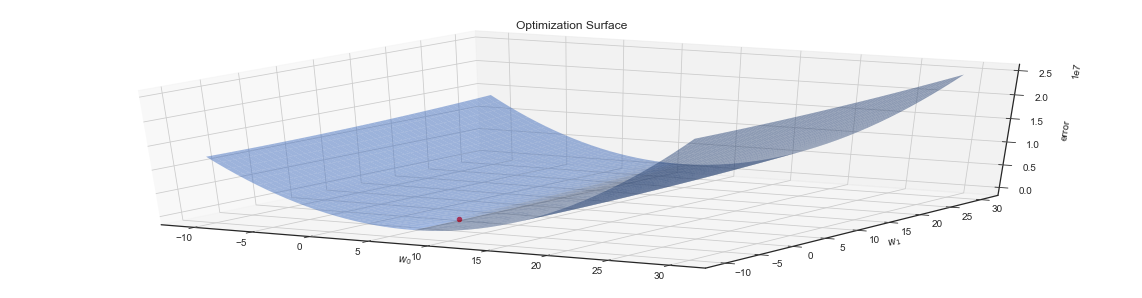

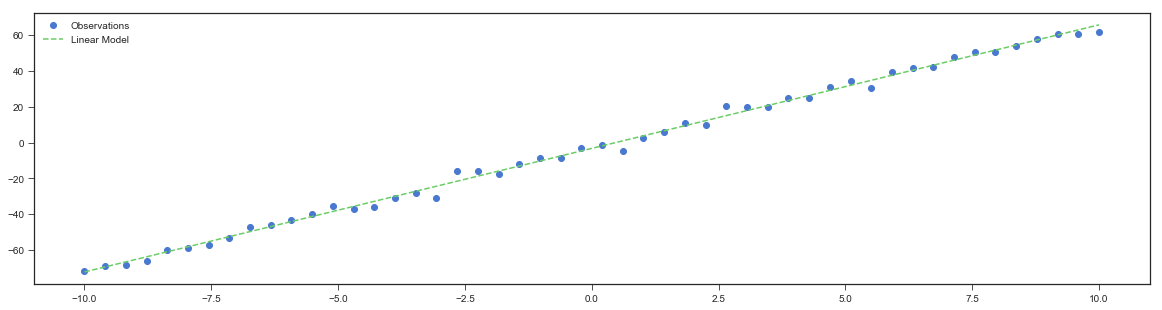

In [77]:
result = minimize(loss(X, y), [0,0])
w = result.x

from mpl_toolkits.mplot3d import Axes3D
__loss = loss(X, y)
b, m = np.meshgrid(np.linspace(-10, 30, 50), np.linspace(-10, 30, 50))

zs = np.array([__loss([_b, _m]) for _b, _m in zip(np.ravel(b), np.ravel(m))])

Z = zs.reshape(m.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(m, b, Z, rstride=1, cstride=1, alpha=0.5)
ax.scatter(w[1], w[0], __loss(w), color='red')

ax.set_title('Optimization Surface')
ax.set_xlabel('$w_{0}$')
ax.set_ylabel('$w_{1}$')
ax.set_zlabel('error')

plt.figure()
plt.plot(x, y, 'o', label='Observations')
plt.plot(x, np.dot(X, w), '--', label='Linear Model')
plt.legend();